In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_json("http://127.0.0.1:5500/api/v1.0/perthcity")

In [3]:
df

,address,agent,bathrooms,bedrooms,building_size,built_date,car_space,full_address,land_size,lat,lng,postcode,price,property_type,rent,rent_date,sale_id,sold_date,state,suburb
0,1/10 Pendal Lane,not recorded,2,2,90,2003,1,1/10 Pendal Lane Perth WA 6000,96,-31.943275,115.856012,6000,359000,Apartment,470,2010-01,1,2020-01,WA,Perth
1,1/10 Wright Street,not recorded,1,2,62,1979,1,1/10 Wright Street Perth WA 6000,62,-31.940382,115.873713,6000,355000,Townhouse,340,2018-01,2,2020-01,WA,Perth
2,1/308 Stirling Street,Peter Thomas,1,2,59,1965,1,1/308 Stirling Street Perth WA 6000,59,-31.942238,115.869436,6000,325000,Unit,300,2012-01,3,2021-01,WA,Perth
3,1/33 Windsor Street,not recorded,2,2,56,2016,1,1/33 Windsor Street Perth WA 6000,97,-31.944320,115.874520,6000,360000,Apartment,360,2020-01,4,2020-01,WA,Perth
4,1/478 William Street,not recorded,2,2,90,2009,2,1/478 William Street Perth WA 6000,129,-31.941260,115.863844,6000,523000,Apartment,475,2020-01,5,2021-01,WA,Perth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,25/20 Pendal Lane,For Sale By Owner Australia,2,3,161,2003,2,25/20 Pendal Lane Northbridge WA 6003,203,-31.942841,115.856104,6003,724999,Townhouse,590,2018-01,1614,2013-01,WA,Northbridge
1614,21/145 Newcastle Street,Realmark Central - East Perth,2,3,104,2009,1,21/145 Newcastle Street Northbridge WA 6003,151,-31.946895,115.861846,6003,614000,Apartment,0,1900-01,1615,2013-01,WA,Northbridge
1615,18/76 Newcastle Street,Abel Property - Leederville,2,2,88,2007,1,18/76 Newcastle Street Northbridge WA 6003,123,-31.948372,115.866086,6003,535000,Apartment,530,2014-01,1616,2013-01,WA,Northbridge
1616,10/89 Lake Street,BOSS Real Estate - Northbridge,2,3,99,2009,1,10/89 Lake Street Northbridge WA 6003,139,-31.945441,115.857860,6003,590000,Apartment,540,2011-01,1617,2013-01,WA,Northbridge


# Filter Outliers

To git rid of outliers, we need to filter:

    * Properties sold before 2019
    * landsize over 2000 sqm
    * carspace,bedroom over 6
    * Properties price over 3M

In [4]:
df['sold_date']= df['sold_date'].astype('datetime64[ns]')
df['sold_date'] = df['sold_date'].dt.strftime('%Y')
df['sold_date'] = df['sold_date'].astype('int')

In [5]:
df.dtypes

address           object
agent             object
bathrooms          int64
bedrooms           int64
building_size      int64
built_date         int64
car_space          int64
full_address      object
land_size          int64
lat              float64
lng              float64
postcode           int64
price              int64
property_type     object
rent               int64
rent_date         object
sale_id            int64
sold_date          int32
state             object
suburb            object
dtype: object

In [6]:
After2019_df = df[(df['sold_date']>2019)]
After2019_df

,address,agent,bathrooms,bedrooms,building_size,built_date,car_space,full_address,land_size,lat,lng,postcode,price,property_type,rent,rent_date,sale_id,sold_date,state,suburb
0,1/10 Pendal Lane,not recorded,2,2,90,2003,1,1/10 Pendal Lane Perth WA 6000,96,-31.943275,115.856012,6000,359000,Apartment,470,2010-01,1,2020,WA,Perth
1,1/10 Wright Street,not recorded,1,2,62,1979,1,1/10 Wright Street Perth WA 6000,62,-31.940382,115.873713,6000,355000,Townhouse,340,2018-01,2,2020,WA,Perth
2,1/308 Stirling Street,Peter Thomas,1,2,59,1965,1,1/308 Stirling Street Perth WA 6000,59,-31.942238,115.869436,6000,325000,Unit,300,2012-01,3,2021,WA,Perth
3,1/33 Windsor Street,not recorded,2,2,56,2016,1,1/33 Windsor Street Perth WA 6000,97,-31.944320,115.874520,6000,360000,Apartment,360,2020-01,4,2020,WA,Perth
4,1/478 William Street,not recorded,2,2,90,2009,2,1/478 William Street Perth WA 6000,129,-31.941260,115.863844,6000,523000,Apartment,475,2020-01,5,2021,WA,Perth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,205/403 Newcastle Street,not recorded,2,2,72,2009,1,205/403 Newcastle Street Northbridge WA 6003,99,-31.942904,115.853147,6003,330000,Unit,420,2020-01,1396,2020,WA,Northbridge
1396,14/5 Antonas Road,not recorded,2,0,69,2010,1,14/5 Antonas Road Northbridge WA 6003,98,-31.944030,115.854829,6003,315000,Unit,0,1900-01,1397,2020,WA,Northbridge
1397,77/269 James Street,not recorded,2,2,78,2016,1,77/269 James Street Northbridge WA 6003,112,-31.946010,115.851866,6003,465000,Unit,0,1900-01,1398,2020,WA,Northbridge
1398,18/134 Aberdeen Street,not recorded,2,2,88,2005,1,18/134 Aberdeen Street Northbridge WA 6003,123,-31.945080,115.856474,6003,390000,Unit,0,1900-01,1399,2020,WA,Northbridge


In [7]:
Less2000sqm_df = After2019_df[(After2019_df['land_size']<2000)]
Less2000sqm_df

,address,agent,bathrooms,bedrooms,building_size,built_date,car_space,full_address,land_size,lat,lng,postcode,price,property_type,rent,rent_date,sale_id,sold_date,state,suburb
0,1/10 Pendal Lane,not recorded,2,2,90,2003,1,1/10 Pendal Lane Perth WA 6000,96,-31.943275,115.856012,6000,359000,Apartment,470,2010-01,1,2020,WA,Perth
1,1/10 Wright Street,not recorded,1,2,62,1979,1,1/10 Wright Street Perth WA 6000,62,-31.940382,115.873713,6000,355000,Townhouse,340,2018-01,2,2020,WA,Perth
2,1/308 Stirling Street,Peter Thomas,1,2,59,1965,1,1/308 Stirling Street Perth WA 6000,59,-31.942238,115.869436,6000,325000,Unit,300,2012-01,3,2021,WA,Perth
3,1/33 Windsor Street,not recorded,2,2,56,2016,1,1/33 Windsor Street Perth WA 6000,97,-31.944320,115.874520,6000,360000,Apartment,360,2020-01,4,2020,WA,Perth
4,1/478 William Street,not recorded,2,2,90,2009,2,1/478 William Street Perth WA 6000,129,-31.941260,115.863844,6000,523000,Apartment,475,2020-01,5,2021,WA,Perth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,205/403 Newcastle Street,not recorded,2,2,72,2009,1,205/403 Newcastle Street Northbridge WA 6003,99,-31.942904,115.853147,6003,330000,Unit,420,2020-01,1396,2020,WA,Northbridge
1396,14/5 Antonas Road,not recorded,2,0,69,2010,1,14/5 Antonas Road Northbridge WA 6003,98,-31.944030,115.854829,6003,315000,Unit,0,1900-01,1397,2020,WA,Northbridge
1397,77/269 James Street,not recorded,2,2,78,2016,1,77/269 James Street Northbridge WA 6003,112,-31.946010,115.851866,6003,465000,Unit,0,1900-01,1398,2020,WA,Northbridge
1398,18/134 Aberdeen Street,not recorded,2,2,88,2005,1,18/134 Aberdeen Street Northbridge WA 6003,123,-31.945080,115.856474,6003,390000,Unit,0,1900-01,1399,2020,WA,Northbridge


In [8]:
carspaceLessThan7_df = Less2000sqm_df[(Less2000sqm_df['car_space']<7)]
carspaceLessThan7_df

,address,agent,bathrooms,bedrooms,building_size,built_date,car_space,full_address,land_size,lat,lng,postcode,price,property_type,rent,rent_date,sale_id,sold_date,state,suburb
0,1/10 Pendal Lane,not recorded,2,2,90,2003,1,1/10 Pendal Lane Perth WA 6000,96,-31.943275,115.856012,6000,359000,Apartment,470,2010-01,1,2020,WA,Perth
1,1/10 Wright Street,not recorded,1,2,62,1979,1,1/10 Wright Street Perth WA 6000,62,-31.940382,115.873713,6000,355000,Townhouse,340,2018-01,2,2020,WA,Perth
2,1/308 Stirling Street,Peter Thomas,1,2,59,1965,1,1/308 Stirling Street Perth WA 6000,59,-31.942238,115.869436,6000,325000,Unit,300,2012-01,3,2021,WA,Perth
3,1/33 Windsor Street,not recorded,2,2,56,2016,1,1/33 Windsor Street Perth WA 6000,97,-31.944320,115.874520,6000,360000,Apartment,360,2020-01,4,2020,WA,Perth
4,1/478 William Street,not recorded,2,2,90,2009,2,1/478 William Street Perth WA 6000,129,-31.941260,115.863844,6000,523000,Apartment,475,2020-01,5,2021,WA,Perth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,205/403 Newcastle Street,not recorded,2,2,72,2009,1,205/403 Newcastle Street Northbridge WA 6003,99,-31.942904,115.853147,6003,330000,Unit,420,2020-01,1396,2020,WA,Northbridge
1396,14/5 Antonas Road,not recorded,2,0,69,2010,1,14/5 Antonas Road Northbridge WA 6003,98,-31.944030,115.854829,6003,315000,Unit,0,1900-01,1397,2020,WA,Northbridge
1397,77/269 James Street,not recorded,2,2,78,2016,1,77/269 James Street Northbridge WA 6003,112,-31.946010,115.851866,6003,465000,Unit,0,1900-01,1398,2020,WA,Northbridge
1398,18/134 Aberdeen Street,not recorded,2,2,88,2005,1,18/134 Aberdeen Street Northbridge WA 6003,123,-31.945080,115.856474,6003,390000,Unit,0,1900-01,1399,2020,WA,Northbridge


In [9]:
BedroomsLessthan7_df = carspaceLessThan7_df[(carspaceLessThan7_df['bedrooms']<7)]
BedroomsLessthan7_df

,address,agent,bathrooms,bedrooms,building_size,built_date,car_space,full_address,land_size,lat,lng,postcode,price,property_type,rent,rent_date,sale_id,sold_date,state,suburb
0,1/10 Pendal Lane,not recorded,2,2,90,2003,1,1/10 Pendal Lane Perth WA 6000,96,-31.943275,115.856012,6000,359000,Apartment,470,2010-01,1,2020,WA,Perth
1,1/10 Wright Street,not recorded,1,2,62,1979,1,1/10 Wright Street Perth WA 6000,62,-31.940382,115.873713,6000,355000,Townhouse,340,2018-01,2,2020,WA,Perth
2,1/308 Stirling Street,Peter Thomas,1,2,59,1965,1,1/308 Stirling Street Perth WA 6000,59,-31.942238,115.869436,6000,325000,Unit,300,2012-01,3,2021,WA,Perth
3,1/33 Windsor Street,not recorded,2,2,56,2016,1,1/33 Windsor Street Perth WA 6000,97,-31.944320,115.874520,6000,360000,Apartment,360,2020-01,4,2020,WA,Perth
4,1/478 William Street,not recorded,2,2,90,2009,2,1/478 William Street Perth WA 6000,129,-31.941260,115.863844,6000,523000,Apartment,475,2020-01,5,2021,WA,Perth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,205/403 Newcastle Street,not recorded,2,2,72,2009,1,205/403 Newcastle Street Northbridge WA 6003,99,-31.942904,115.853147,6003,330000,Unit,420,2020-01,1396,2020,WA,Northbridge
1396,14/5 Antonas Road,not recorded,2,0,69,2010,1,14/5 Antonas Road Northbridge WA 6003,98,-31.944030,115.854829,6003,315000,Unit,0,1900-01,1397,2020,WA,Northbridge
1397,77/269 James Street,not recorded,2,2,78,2016,1,77/269 James Street Northbridge WA 6003,112,-31.946010,115.851866,6003,465000,Unit,0,1900-01,1398,2020,WA,Northbridge
1398,18/134 Aberdeen Street,not recorded,2,2,88,2005,1,18/134 Aberdeen Street Northbridge WA 6003,123,-31.945080,115.856474,6003,390000,Unit,0,1900-01,1399,2020,WA,Northbridge


In [10]:
filtered_df = BedroomsLessthan7_df[(BedroomsLessthan7_df['price']<3000000)]

# Data Preporcessing

In [11]:
#only getting landed properties for the machine learning
house = filtered_df[(filtered_df['property_type']=='House') | (filtered_df['property_type']=='Villa') | (filtered_df['property_type']=='Townhouse')]
house

,address,agent,bathrooms,bedrooms,building_size,built_date,car_space,full_address,land_size,lat,lng,postcode,price,property_type,rent,rent_date,sale_id,sold_date,state,suburb
1,1/10 Wright Street,not recorded,1,2,62,1979,1,1/10 Wright Street Perth WA 6000,62,-31.940382,115.873713,6000,355000,Townhouse,340,2018-01,2,2020,WA,Perth
6,10 Pisconeri Street,Daniel Porcaro,2,4,289,2008,3,10 Pisconeri Street Perth WA 6000,302,-31.948521,115.867500,6000,1308000,House,700,2018-01,7,2021,WA,Perth
7,10 Robinson Avenue,Claude Iaconi,2,2,174,1995,2,10 Robinson Avenue Perth WA 6000,241,-31.944291,115.864298,6000,880000,House,550,2018-01,8,2020,WA,Perth
8,10/10 Wright Street,not recorded,1,2,62,1979,1,10/10 Wright Street Perth WA 6000,62,-31.943972,115.871931,6000,447500,Townhouse,460,2013-01,9,2020,WA,Perth
21,11 Lindsay Street,Meryl Carter,2,3,155,2010,2,11 Lindsay Street Perth WA 6000,240,-31.946328,115.863013,6000,1100000,House,780,2021-01,22,2021,WA,Perth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222,43 Mountjoy Road,not recorded,2,4,312,1960,2,43 Mountjoy Road Nedlands WA 6009,1012,-31.983957,115.800993,6009,1650000,House,0,1900-01,1223,2020,WA,Nedlands
1376,43 John Street,Claude Iaconi,2,2,116,1996,1,43 John Street Northbridge WA 6003,174,-31.945219,115.853374,6003,620000,Townhouse,0,1900-01,1377,2021,WA,Northbridge
1384,16 Kakulas Crescent,Claude Iaconi,2,3,250,2005,2,16 Kakulas Crescent Northbridge WA 6003,246,-31.945229,115.857610,6003,1250000,House,0,1900-01,1385,2021,WA,Northbridge
1389,107/228 James Street,not recorded,2,3,123,1995,1,107/228 James Street Northbridge WA 6003,158,-31.946032,115.853239,6003,415000,Townhouse,0,1900-01,1390,2020,WA,Northbridge


In [12]:
house.columns

Index(['address', 'agent', 'bathrooms', 'bedrooms', 'building_size',
       'built_date', 'car_space', 'full_address', 'land_size', 'lat', 'lng',
       'postcode', 'price', 'property_type', 'rent', 'rent_date', 'sale_id',
       'sold_date', 'state', 'suburb'],
      dtype='object')

In [13]:
# for i in range(0,len(house['sale_id'])):
#     if house.iloc[i,13] =='Villa':
#         house.iloc[i,13] = 1
#     elif house.iloc[i,13] =='Townhouse':
#         house.iloc[i,13]= 2
#     elif house.iloc[i,13] =='House':
#         house.iloc[i,13] = 3
    
#     house.iloc[i,15] = int(house.iloc[i,15].split('-')[0])
#     if house.iloc[i,15]== 1900:
#         house.iloc[i,15] = 0
# house

In [14]:
# house['median_income'] = ''

In [15]:
# for i in range(0,len(house['sale_id'])):
#     if house.iloc[i,19] =='Perth':
#         house.iloc[i,20] = 1750
#     elif house.iloc[i,19] =='Crawley':
#         house.iloc[i,20]= 1145
#     elif house.iloc[i,19] =='Nedlands':
#         house.iloc[i,20] = 2217
#     elif house.iloc[i,19] =='Northbridge':
#         house.iloc[i,20] = 1385
#         elif house.iloc[i,19] =='Northbridge':
#         house.iloc[i,20] = 1385

In [16]:
house['perth'] = ''
house['east_perth'] = ''
house['west_perth'] = ''
house['northbridge'] = ''
house['crawley'] = ''
house['nedlands'] = ''

C:\Users\helena\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\helena\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\helena\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [17]:
for i in range(0,len(house['sale_id'])):
    if house.iloc[i,19] =='Perth':
        house.iloc[i,20] = 1
        house.iloc[i,21:26] = 0
    elif house.iloc[i,19] =='East Perth':
        house.iloc[i,21] = 1
        house.iloc[i,20] = 0
        house.iloc[i,22:26] = 0
    elif house.iloc[i,19] =='West Perth':
        house.iloc[i,22] = 1
        house.iloc[i,20:22] = 0
        house.iloc[i,23:26] = 0
    elif house.iloc[i,19] =='Northbridge':
        house.iloc[i,23] = 1
        house.iloc[i,20:23] = 0
        house.iloc[i,24:26] = 0
    elif house.iloc[i,19] =='Crawley':
        house.iloc[i,24] = 1
        house.iloc[i,20:24] = 0
        house.iloc[i,25] = 0
    elif house.iloc[i,19] =='Nedlands':
        house.iloc[i,25] = 1
        house.iloc[i,20:25] = 0

house

C:\Users\helena\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,address,agent,bathrooms,bedrooms,building_size,built_date,car_space,full_address,land_size,lat,...,sale_id,sold_date,state,suburb,perth,east_perth,west_perth,northbridge,crawley,nedlands
1,1/10 Wright Street,not recorded,1,2,62,1979,1,1/10 Wright Street Perth WA 6000,62,-31.940382,...,2,2020,WA,Perth,1,0,0,0,0,0
6,10 Pisconeri Street,Daniel Porcaro,2,4,289,2008,3,10 Pisconeri Street Perth WA 6000,302,-31.948521,...,7,2021,WA,Perth,1,0,0,0,0,0
7,10 Robinson Avenue,Claude Iaconi,2,2,174,1995,2,10 Robinson Avenue Perth WA 6000,241,-31.944291,...,8,2020,WA,Perth,1,0,0,0,0,0
8,10/10 Wright Street,not recorded,1,2,62,1979,1,10/10 Wright Street Perth WA 6000,62,-31.943972,...,9,2020,WA,Perth,1,0,0,0,0,0
21,11 Lindsay Street,Meryl Carter,2,3,155,2010,2,11 Lindsay Street Perth WA 6000,240,-31.946328,...,22,2021,WA,Perth,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222,43 Mountjoy Road,not recorded,2,4,312,1960,2,43 Mountjoy Road Nedlands WA 6009,1012,-31.983957,...,1223,2020,WA,Nedlands,0,0,0,0,0,1
1376,43 John Street,Claude Iaconi,2,2,116,1996,1,43 John Street Northbridge WA 6003,174,-31.945219,...,1377,2021,WA,Northbridge,0,0,0,1,0,0
1384,16 Kakulas Crescent,Claude Iaconi,2,3,250,2005,2,16 Kakulas Crescent Northbridge WA 6003,246,-31.945229,...,1385,2021,WA,Northbridge,0,0,0,1,0,0
1389,107/228 James Street,not recorded,2,3,123,1995,1,107/228 James Street Northbridge WA 6003,158,-31.946032,...,1390,2020,WA,Northbridge,0,0,0,1,0,0


In [18]:
# house.sort_values(by = ['price'], ascending=False)

In [19]:
# # Assign the data to X and y
# X = house[["bedrooms", "bathrooms", "car_space", "land_size", "building_size", "built_date", "postcode"]]
# y = house["price"].values.reshape(-1, 1)
# print(X.shape, y.shape)

In [20]:
# Assign the data to X and y
X = house[["bedrooms", "bathrooms", "car_space", "land_size", "building_size", "built_date", "perth", "west_perth", "east_perth", "northbridge", "crawley", "nedlands"]]
y = house["price"].values.reshape(-1, 1)
print(X.shape, y.shape)

(223, 12) (223, 1)


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [22]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [23]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [24]:
# Create the model using LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)


LinearRegression()

In [25]:
# #evaluate the model (intercept and slope)
# print(model.intercept_)
# print(model.coef_)

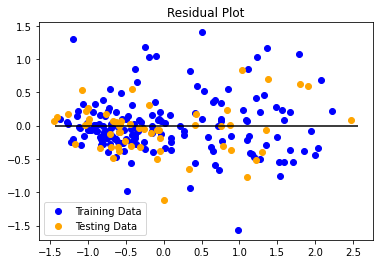

In [26]:
# Make predictions using a fitted model
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), y_train_scaled - model.predict(X_train_scaled), c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), y_test_scaled - model.predict(X_test_scaled), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [27]:
#compare actual output values with predicted values
df1 = X_test
df1['Actual'] = y_test.reshape(1,-1)[0]
df1['Linear_Regression_Predicted'] = y_scaler.inverse_transform(model.predict(X_test_scaled))
df1.head(10)

C:\Users\helena\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\helena\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,bedrooms,bathrooms,car_space,land_size,building_size,built_date,perth,west_perth,east_perth,northbridge,crawley,nedlands,Actual,Linear_Regression_Predicted
1141,3,1,1,110,110,1976,0,0,0,0,0,1,555000,7.616198e+05
591,3,2,1,530,152,2000,0,0,1,0,0,0,869000,1.117595e+06
205,1,1,1,46,46,2011,1,0,0,0,0,0,265000,2.202090e+05
244,3,1,2,305,120,1991,1,0,0,0,0,0,775000,6.610604e+05
345,3,2,2,199,146,2020,0,1,0,0,0,0,770000,7.221178e+05
1125,4,2,6,883,282,1938,0,0,0,0,0,1,2480000,2.034646e+06
754,2,2,1,114,84,2007,0,0,1,0,0,0,390000,6.081399e+05
1138,2,1,1,343,93,1945,0,0,0,0,0,1,745000,9.505370e+05
7,2,2,2,241,174,1995,1,0,0,0,0,0,880000,8.673710e+05
1160,3,2,1,1034,134,1937,0,0,0,0,0,1,1490000,1.720579e+06


In [28]:
# Fit the model to the training data and calculate the scores for the training and testing data

training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8246697771029599
Testing Score: 0.8683046304551345


In [29]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.13176692988739233, R2: 0.8683046304551345


In [30]:
#test
# suburb needs to be categorical
X_test = X_scaler.transform([[4,3,2,175,186,2019,0,0,0,0,1,0]])
predictions = model.predict(X_test)
results = y_scaler.inverse_transform(predictions)
results


array([[1044045.46949555]])

# LASSO model

In [31]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso


lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

lasso_predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, lasso_predictions) #error to a model (closer to 0 the better)
r2 = lasso.score(X_test_scaled, y_test_scaled) #nearer to 1 the better

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.1300401820031899, R2: 0.8700304405724014


In [32]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

param_grid = dict(alpha=alpha)

lasso_grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)

lasso_grid_result = lasso_grid.fit(X_train_scaled, y_train_scaled)

# lasso_grid_predictions = lasso_grid_model(X_test_scaled)

# MSE = mean_squared_error(y_test_scaled, lasso_grid_predictions) #error to a model (closer to 0 the better)
# r2 = lasso_grid_model.score(X_test_scaled, y_test_scaled) #nearer to 1 the better

# print(f"MSE: {MSE}, R2: {r2}")
print('Best Score: ', lasso_grid_result.best_score_)
print('Best Params: ', lasso_grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.7931157422007331
Best Params:  {'alpha': 0.01}


In [33]:
best_lasso = Lasso(alpha=0.01).fit(X_train_scaled, y_train_scaled)

best_lasso_predictions = best_lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, best_lasso_predictions)
r2 = best_lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.1300401820031899, R2: 0.8700304405724014


In [34]:
df1['Lasso_Predicted'] = y_scaler.inverse_transform(best_lasso.predict(X_test_scaled))
df1.head(10)

C:\Users\helena\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,bedrooms,bathrooms,car_space,land_size,building_size,built_date,perth,west_perth,east_perth,northbridge,crawley,nedlands,Actual,Linear_Regression_Predicted,Lasso_Predicted
1141,3,1,1,110,110,1976,0,0,0,0,0,1,555000,7.616198e+05,7.685659e+05
591,3,2,1,530,152,2000,0,0,1,0,0,0,869000,1.117595e+06,1.111387e+06
205,1,1,1,46,46,2011,1,0,0,0,0,0,265000,2.202090e+05,2.457796e+05
244,3,1,2,305,120,1991,1,0,0,0,0,0,775000,6.610604e+05,6.862344e+05
345,3,2,2,199,146,2020,0,1,0,0,0,0,770000,7.221178e+05,7.461852e+05
1125,4,2,6,883,282,1938,0,0,0,0,0,1,2480000,2.034646e+06,2.005685e+06
754,2,2,1,114,84,2007,0,0,1,0,0,0,390000,6.081399e+05,5.983212e+05
1138,2,1,1,343,93,1945,0,0,0,0,0,1,745000,9.505370e+05,9.447412e+05
7,2,2,2,241,174,1995,1,0,0,0,0,0,880000,8.673710e+05,8.762308e+05
1160,3,2,1,1034,134,1937,0,0,0,0,0,1,1490000,1.720579e+06,1.709489e+06


# Ridge model

In [35]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge


ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

ridge_predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, ridge_predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.13176472213952886, R2: 0.8683068370040083


In [36]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

param_grid = dict(alpha=alpha)

ridge_grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)

ridge_grid_result = ridge_grid.fit(X_train_scaled, y_train_scaled)

# ridge_grid_predictions = ridge_grid(X_test_scaled)

# MSE = mean_squared_error(y_test_scaled, ridge_grid_predictions) #error to a model (closer to 0 the better)
# r2 = ridge_grid.score(X_test_scaled, y_test_scaled) #nearer to 1 the better

# print(f"MSE: {MSE}, R2: {r2}")
print('Best Score: ', ridge_grid_result.best_score_)
print('Best Params: ', ridge_grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.7928094676983035
Best Params:  {'alpha': 10}


In [37]:
best_ridge = Ridge(alpha=10).fit(X_train_scaled, y_train_scaled)

best_ridge_predictions = best_ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, best_ridge_predictions)
r2 = best_ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.13151908269832782, R2: 0.8685523430426738


In [38]:
df1['Ridge_Predicted'] = y_scaler.inverse_transform(best_ridge.predict(X_test_scaled))
df1.head(10)

C:\Users\helena\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,bedrooms,bathrooms,car_space,land_size,building_size,built_date,perth,west_perth,east_perth,northbridge,crawley,nedlands,Actual,Linear_Regression_Predicted,Lasso_Predicted,Ridge_Predicted
1141,3,1,1,110,110,1976,0,0,0,0,0,1,555000,7.616198e+05,7.685659e+05,7.957068e+05
591,3,2,1,530,152,2000,0,0,1,0,0,0,869000,1.117595e+06,1.111387e+06,1.100718e+06
205,1,1,1,46,46,2011,1,0,0,0,0,0,265000,2.202090e+05,2.457796e+05,2.248774e+05
244,3,1,2,305,120,1991,1,0,0,0,0,0,775000,6.610604e+05,6.862344e+05,6.887671e+05
345,3,2,2,199,146,2020,0,1,0,0,0,0,770000,7.221178e+05,7.461852e+05,7.334869e+05
1125,4,2,6,883,282,1938,0,0,0,0,0,1,2480000,2.034646e+06,2.005685e+06,2.028541e+06
754,2,2,1,114,84,2007,0,0,1,0,0,0,390000,6.081399e+05,5.983212e+05,6.059438e+05
1138,2,1,1,343,93,1945,0,0,0,0,0,1,745000,9.505370e+05,9.447412e+05,9.471472e+05
7,2,2,2,241,174,1995,1,0,0,0,0,0,880000,8.673710e+05,8.762308e+05,8.532735e+05
1160,3,2,1,1034,134,1937,0,0,0,0,0,1,1490000,1.720579e+06,1.709489e+06,1.689593e+06


# ElasticNet model

In [39]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

elas_predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, elas_predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.13098639213274496, R2: 0.869084744313216


In [40]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

param_grid = dict(alpha=alpha)

elasticnet_grid = GridSearchCV(estimator=elasticnet, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)

elasticnet_grid_result= elasticnet_grid.fit(X_train_scaled, y_train_scaled)

# elasticnet_grid_predictions = elasticnet_grid(X_test_scaled)

# MSE = mean_squared_error(y_test_scaled, elasticnet_grid_predictions) #error to a model (closer to 0 the better)
# r2 = elasticnet_grid.score(X_test_scaled, y_test_scaled) #nearer to 1 the better

# print(f"MSE: {MSE}, R2: {r2}")
print('Best Score: ', elasticnet_grid_result.best_score_)
print('Best Params: ', elasticnet_grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.7925836252807492
Best Params:  {'alpha': 0.01}


In [41]:
df1['elasticnet_Predicted'] = y_scaler.inverse_transform(elasticnet.predict(X_test_scaled))
df1.head(10)

C:\Users\helena\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,bedrooms,bathrooms,car_space,land_size,building_size,built_date,perth,west_perth,east_perth,northbridge,crawley,nedlands,Actual,Linear_Regression_Predicted,Lasso_Predicted,Ridge_Predicted,elasticnet_Predicted
1141,3,1,1,110,110,1976,0,0,0,0,0,1,555000,7.616198e+05,7.685659e+05,7.957068e+05,7.682839e+05
591,3,2,1,530,152,2000,0,0,1,0,0,0,869000,1.117595e+06,1.111387e+06,1.100718e+06,1.113324e+06
205,1,1,1,46,46,2011,1,0,0,0,0,0,265000,2.202090e+05,2.457796e+05,2.248774e+05,2.329026e+05
244,3,1,2,305,120,1991,1,0,0,0,0,0,775000,6.610604e+05,6.862344e+05,6.887671e+05,6.763411e+05
345,3,2,2,199,146,2020,0,1,0,0,0,0,770000,7.221178e+05,7.461852e+05,7.334869e+05,7.348739e+05
1125,4,2,6,883,282,1938,0,0,0,0,0,1,2480000,2.034646e+06,2.005685e+06,2.028541e+06,2.019884e+06
754,2,2,1,114,84,2007,0,0,1,0,0,0,390000,6.081399e+05,5.983212e+05,6.059438e+05,6.032471e+05
1138,2,1,1,343,93,1945,0,0,0,0,0,1,745000,9.505370e+05,9.447412e+05,9.471472e+05,9.471572e+05
7,2,2,2,241,174,1995,1,0,0,0,0,0,880000,8.673710e+05,8.762308e+05,8.532735e+05,8.698644e+05
1160,3,2,1,1034,134,1937,0,0,0,0,0,1,1490000,1.720579e+06,1.709489e+06,1.689593e+06,1.712301e+06


# Save the best Model

In [42]:
import joblib
joblib.dump(best_lasso, "best_model.pkl")

['best_model.pkl']

In [43]:
my_model = joblib.load("best_model.pkl")


In [44]:
X_test = X_scaler.transform([[4,3,2,175,186,2019,0,0,0,0,1,0]])
predictions = my_model.predict(X_test)
results = y_scaler.inverse_transform(predictions)
results

array([1020535.71049267])

MAE: 0.26532418836596877
MSE: 0.1300401820031899
RMSE: 0.36061084565385704
VarScore: 0.8723310308932704


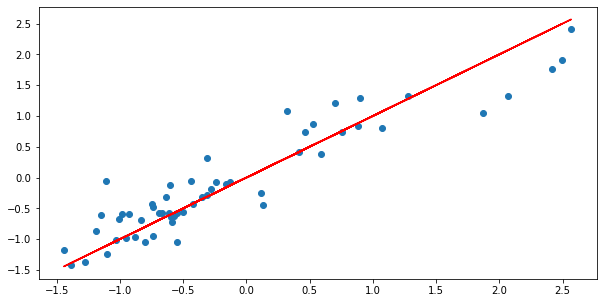

In [45]:
y_pred = my_model.predict(X_test_scaled)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test_scaled, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test_scaled, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_scaled, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test_scaled,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test_scaled,y_pred)
# Perfect predictions
plt.plot(y_test_scaled,y_test_scaled,'r')